# Proyek Customer Churn
- **Nama:** [Ari Fansuri]
- **Email:** [arfansurti26@gmail.com]

## Import Semua Packages/Library yang Digunakan

Mengimpr dan instal semua library yang dibutuhkan.

In [2]:
import os, shutil
import zipfile
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
!pip install ctgan
from ctgan import CTGAN

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.5 MB/s eta 0:00:00


## Data Preparation

Mengimpor dataset dari kaggle dan melakukan ekstrak data dari format berekstensi zip.

In [2]:
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"arifansuri","key":"d3981188f1dc2bffbb2c07769fc846b0"}'}

In [3]:
# Import dataset dari kaggle
!kaggle datasets download -d radheshyamkollipara/bank-customer-churn -p /content/

# Ekstrak file yang sudah diunduh
!unzip bank-customer-churn.zip

Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn
License(s): other
100% 307k/307k [00:00<00:00, 678kB/s]
100% 307k/307k [00:00<00:00, 677kB/s]
Archive:  bank-customer-churn.zip
  inflating: Customer-Churn-Records.csv  


## Data Understanding

## Data Loading

Memuat data yang telah diekstrak dan melakukan assign ke variabel baru bernama df.

In [4]:
# Memuat dataset yang sudah dipersiapkan
df = pd.read_csv('/content/Customer-Churn-Records.csv')

In [5]:
# Memastikan header dan 5 baris teratas dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
# Memastikan header dan 5 baris dataset teratas-tertabawah
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


Berdasarkan data yang ditampilkan, terdapat 3 kolom yang dinyatakan sebagai jenis data kategorikal dan 3 tipe data boolean.

## EDA

Bagian Exploratory Data Analysis (EDA) ini bertujuan untuk mengeksplorasi dataset secara mendalam guna memahami berbagai karakteristik, pola, serta hubungan antar variabel yang mungkin ada. EDA membantu mengidentifikasi tren, anomali, serta pola distribusi, sekaligus menemukan korelasi yang relevan untuk model atau keputusan yang akan diambil. Dengan menggunakan visualisasi data dan statistik deskriptif, dapat menggali lebih dalam untuk mendapatkan wawasan insight berharga yang dapat mendukung langkah pemodelan dan pengambilan keputusan berikutnya.

### Deskripsi Variabel

In [7]:
# Memastikan informasi tipe data pada masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Dari informasi fitur data diatas, terdapat kesalahan dalam penulisan kolom data, beberapa kolom memiliki karakter penghubung menggunakan spasi, yaitu kolom satisfaction score, card type dan point earned. Untuk memudahkan pemrosesan data, kolom-kolom tersebut akan diubah menggunkan karakter underscore sebagai penghubungnya.

In [8]:
# Melakukan analisis statistik sederhana pada kolom data numerikal
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Berdasarkan informasi statistik sederhana diatas ditemukan bahwa;
* **Usia** tertinggi nasabah adalah 92 tahun dan yang termuda adalah 18 tahun.
* **Kredit skor** tertinggi adalah 850 poin, terendah 350 poin dan rata-rata kredit skor yang diperoleh nasabah adalah 650,5 poin.
* **Balance** tertinggi yang dimiliki oleh nasabah adalah 250.898,09 USD, terendah 0 USD dan rata-rata sebesar 76.485,88 USD.
* Estimasi **salary** nasabah paling tinggi sebesar 199.992,48 USD, terendah 11,58 USD dan rata-rata sebesar 100.090,23 USD.
* Skor **kepuasan** yang diberikan oleh nasabah rata-rata 3,01 poin.

In [9]:
# Mengubah nama kolom dengan spasi menjadi underscore
df.columns = [col.replace(' ', '_') for col in df.columns]

# Menampilkan nama kolom setelah perubahan
print("Nama kolom setelah perubahan:")
print(df.columns)

Nama kolom setelah perubahan:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction_Score', 'Card_Type', 'Point_Earned'],
      dtype='object')


Kolom-kolom yang mengalami perubahan diantaranya adalah; **Satisfaction_Score**, **Card_Type** dan **Point_Earned**.

### Missing Value dan Outliers

In [10]:
# Memastikan sel berisi angka nol
nol_value = (df == 0).sum()
print(nol_value)

RowNumber                0
CustomerId               0
Surname                  0
CreditScore              0
Geography                0
Gender                   0
Age                      0
Tenure                 413
Balance               3617
NumOfProducts            0
HasCrCard             2945
IsActiveMember        4849
EstimatedSalary          0
Exited                7962
Complain              7956
Satisfaction_Score       0
Card_Type                0
Point_Earned             0
dtype: int64


Berdasarkan hasil pengecekan pada dataset, beberapa kolom yang berisi nilai nol "0" merupakan hasil transformasi data yang sebelumnya adalaha tipe data boolean. Sehingga nilai nol "0" pada dataframe expected sebagai representasi dari nilai False/No.

In [11]:
# Memastikan kolom berisi data Null
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


Berdasarkan hasil pengecekan pada dataframe, tidak ditemukan adanya sel bernilai "null"/Nan/Kosong.

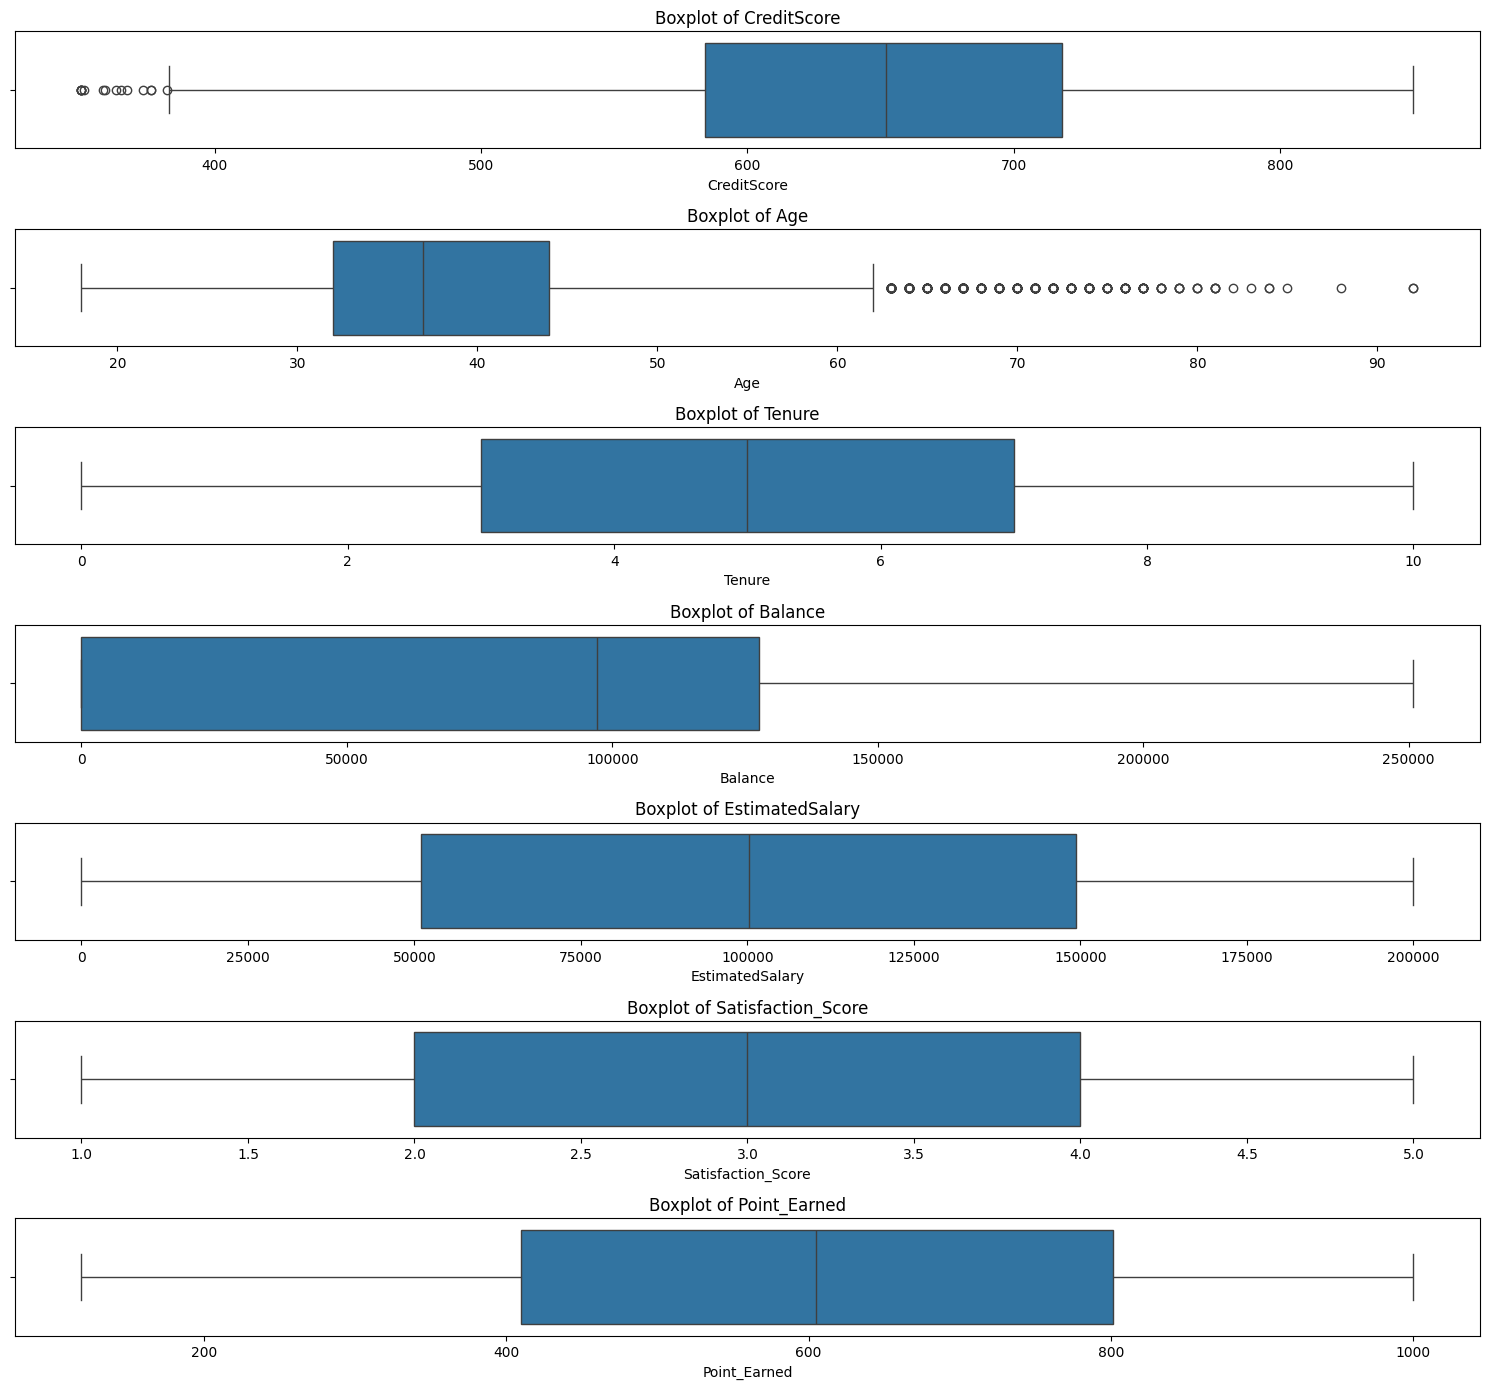

In [12]:
# Menentukan kolom numerik kecuali 'CustomerId' dan 'RowNumber'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if col not in ['CustomerId', 'RowNumber', 'IsActiveMember', 'Exited', 'Complain', 'HasCrCard', 'NumOfProducts']]

# Menyiapkan ukuran plot
plt.figure(figsize=(15, len(numerical_columns) * 2))

# Membuat boxplot untuk setiap kolom numerik yang dipilih
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Berdasarkan hasil identifikasi outlier menggunakan boxplot, tidak ditemukan adanya outlier dan memang dianggap sebagai anomali yang sah dalam sebaran data. Berikut keterangan pada masing-masing fitur:

* Credit score: Outlier pada data credit score dianggap normal karena beberapa customer memiliki kredit score yang rendah.
* Age: Outlier pada kolom Age dianggap normal karena usia customer berada pada rentang yang dianggap normal sebagai usia manusia.
* Balance: Tidak ditemukan adanya outlier, namun kemungkinan besar data memiliki nilai rendah yang cukup dominan, sehingga distribusi data menjadi tidak normal dan mendorong box plot mendekati nilai minimum.

### Univariate Analysis

<ipython-input-13-0512c309e2ea>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="viridis")


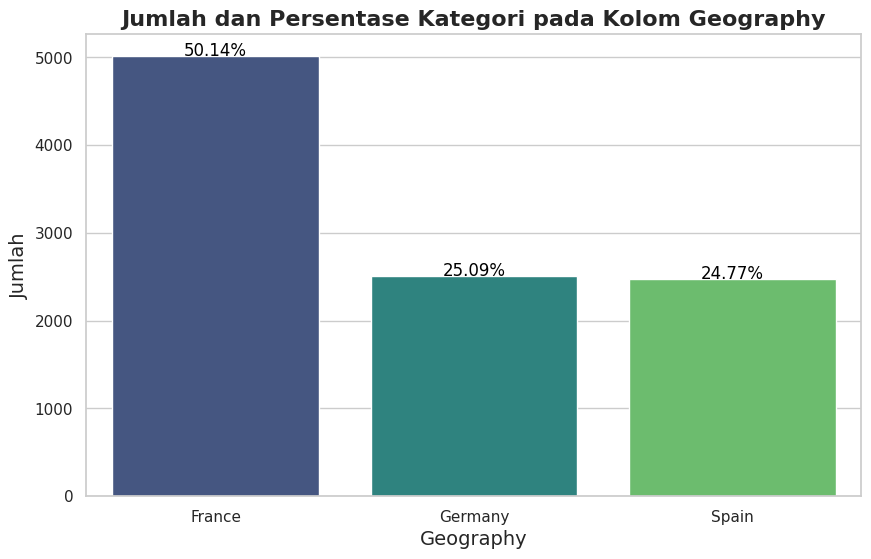

In [13]:
# Fungsi untuk menampilkan grafik batang dengan persentase sebagai teks
def plot_category_counts(column_name):
    # Menghitung jumlah kategori dan persentase
    counts = df[column_name].value_counts()
    percentages = (counts / counts.sum()) * 100

    # Seting gaya grafik
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Membuat grafik batang
    ax = sns.barplot(x=counts.index, y=counts.values, palette="viridis")

    # Menambahkan judul dan label
    plt.title(f'Jumlah dan Persentase Kategori pada Kolom {column_name}', fontsize=16, fontweight='bold')
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)

    # Menambahkan persentase sebagai teks di atas setiap batang
    for i, (count, percent) in enumerate(zip(counts, percentages)):
        ax.text(i, count + 0.5, f'{percent:.2f}%', ha='center', color='black', fontsize=12)

    # Menampilkan grafik
    plt.show()

# Memanggil fungsi dengan kolom yang diinginkan
plot_category_counts('Geography')


Jumlah nasabah berkewarganegaraan Prancis mendominasi keseluruhan jumlah customer, yaitu sebanyak 50,14%. Sedangkan untuk Jerman dan Spanyol memiliki jumlah persentase yang hampir sama, yaitu sekitar 25%.

<ipython-input-14-3d3540bfadfa>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="coolwarm", alpha=0.8)


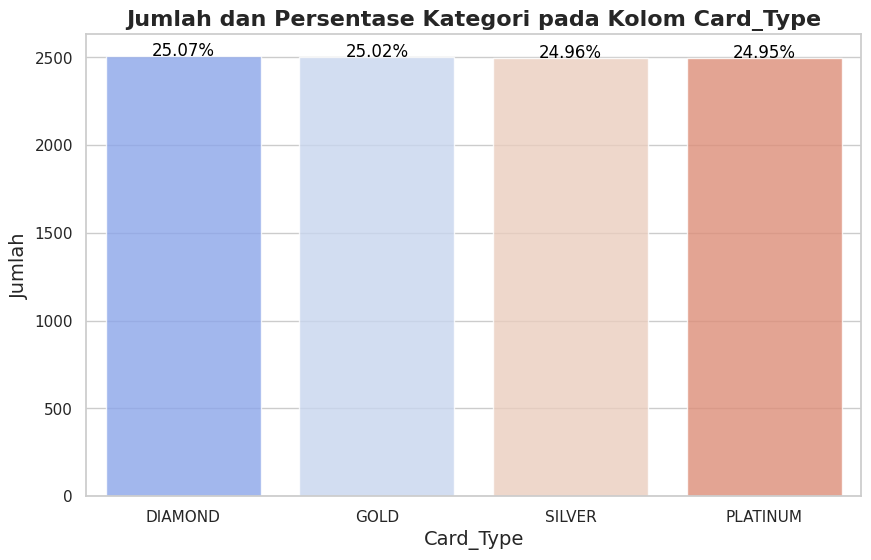

In [14]:
# Fungsi untuk menampilkan grafik batang dengan persentase sebagai teks
def plot_category_counts(column_name):
    # Menghitung jumlah kategori dan persentase
    counts = df[column_name].value_counts()
    percentages = (counts / counts.sum()) * 100

    # Seting gaya grafik
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Membuat grafik batang dengan palet warna yang lebih menarik
    ax = sns.barplot(x=counts.index, y=counts.values, palette="coolwarm", alpha=0.8)

    # Menambahkan judul dan label
    plt.title(f'Jumlah dan Persentase Kategori pada Kolom {column_name}', fontsize=16, fontweight='bold')
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)

    # Menambahkan persentase sebagai teks di atas setiap batang
    for i, (count, percent) in enumerate(zip(counts, percentages)):
        ax.text(i, count + 0.5, f'{percent:.2f}%', ha='center', color='black', fontsize=12)

    # Menampilkan grafik
    plt.show()

# Memanggil fungsi dengan kolom yang diinginkan
plot_category_counts('Card_Type')


Pada masing-masing tipe kartu memiliki besaran data yang seimbang di range sekitar 25% atau sekitar 2500 pengguna per-tipe kartu.

<ipython-input-15-de9e59dfbfe0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="viridis", alpha=0.9)


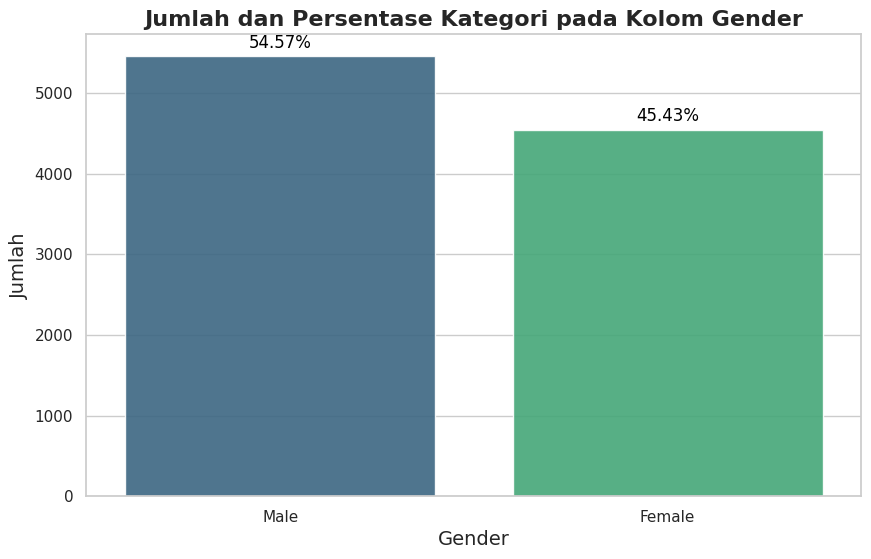

In [15]:
# Fungsi untuk menampilkan grafik batang dengan persentase sebagai teks
def plot_category_counts(column_name):
    # Menghitung jumlah kategori dan persentase
    counts = df[column_name].value_counts()
    percentages = (counts / counts.sum()) * 100

    # Seting gaya grafik
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Membuat grafik batang dengan palet warna yang lebih menarik
    ax = sns.barplot(x=counts.index, y=counts.values, palette="viridis", alpha=0.9)

    # Menambahkan judul dan label
    plt.title(f'Jumlah dan Persentase Kategori pada Kolom {column_name}', fontsize=16, fontweight='bold')
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)

    # Menambahkan persentase sebagai teks di atas setiap batang
    for i, (count, percent) in enumerate(zip(counts, percentages)):
        ax.text(i, count + 0.02 * max(counts), f'{percent:.2f}%', ha='center', color='black', fontsize=12)

    # Menampilkan grafik
    plt.show()

# Memanggil fungsi dengan kolom yang diinginkan
plot_category_counts('Gender')


Pengguna dengan jenis kelamin laki-laki mendominasi sebesar 54,57% dan pengguna dengan jenis kelamin perempuan sebesar 45,43%.

### Multivariate Analysis

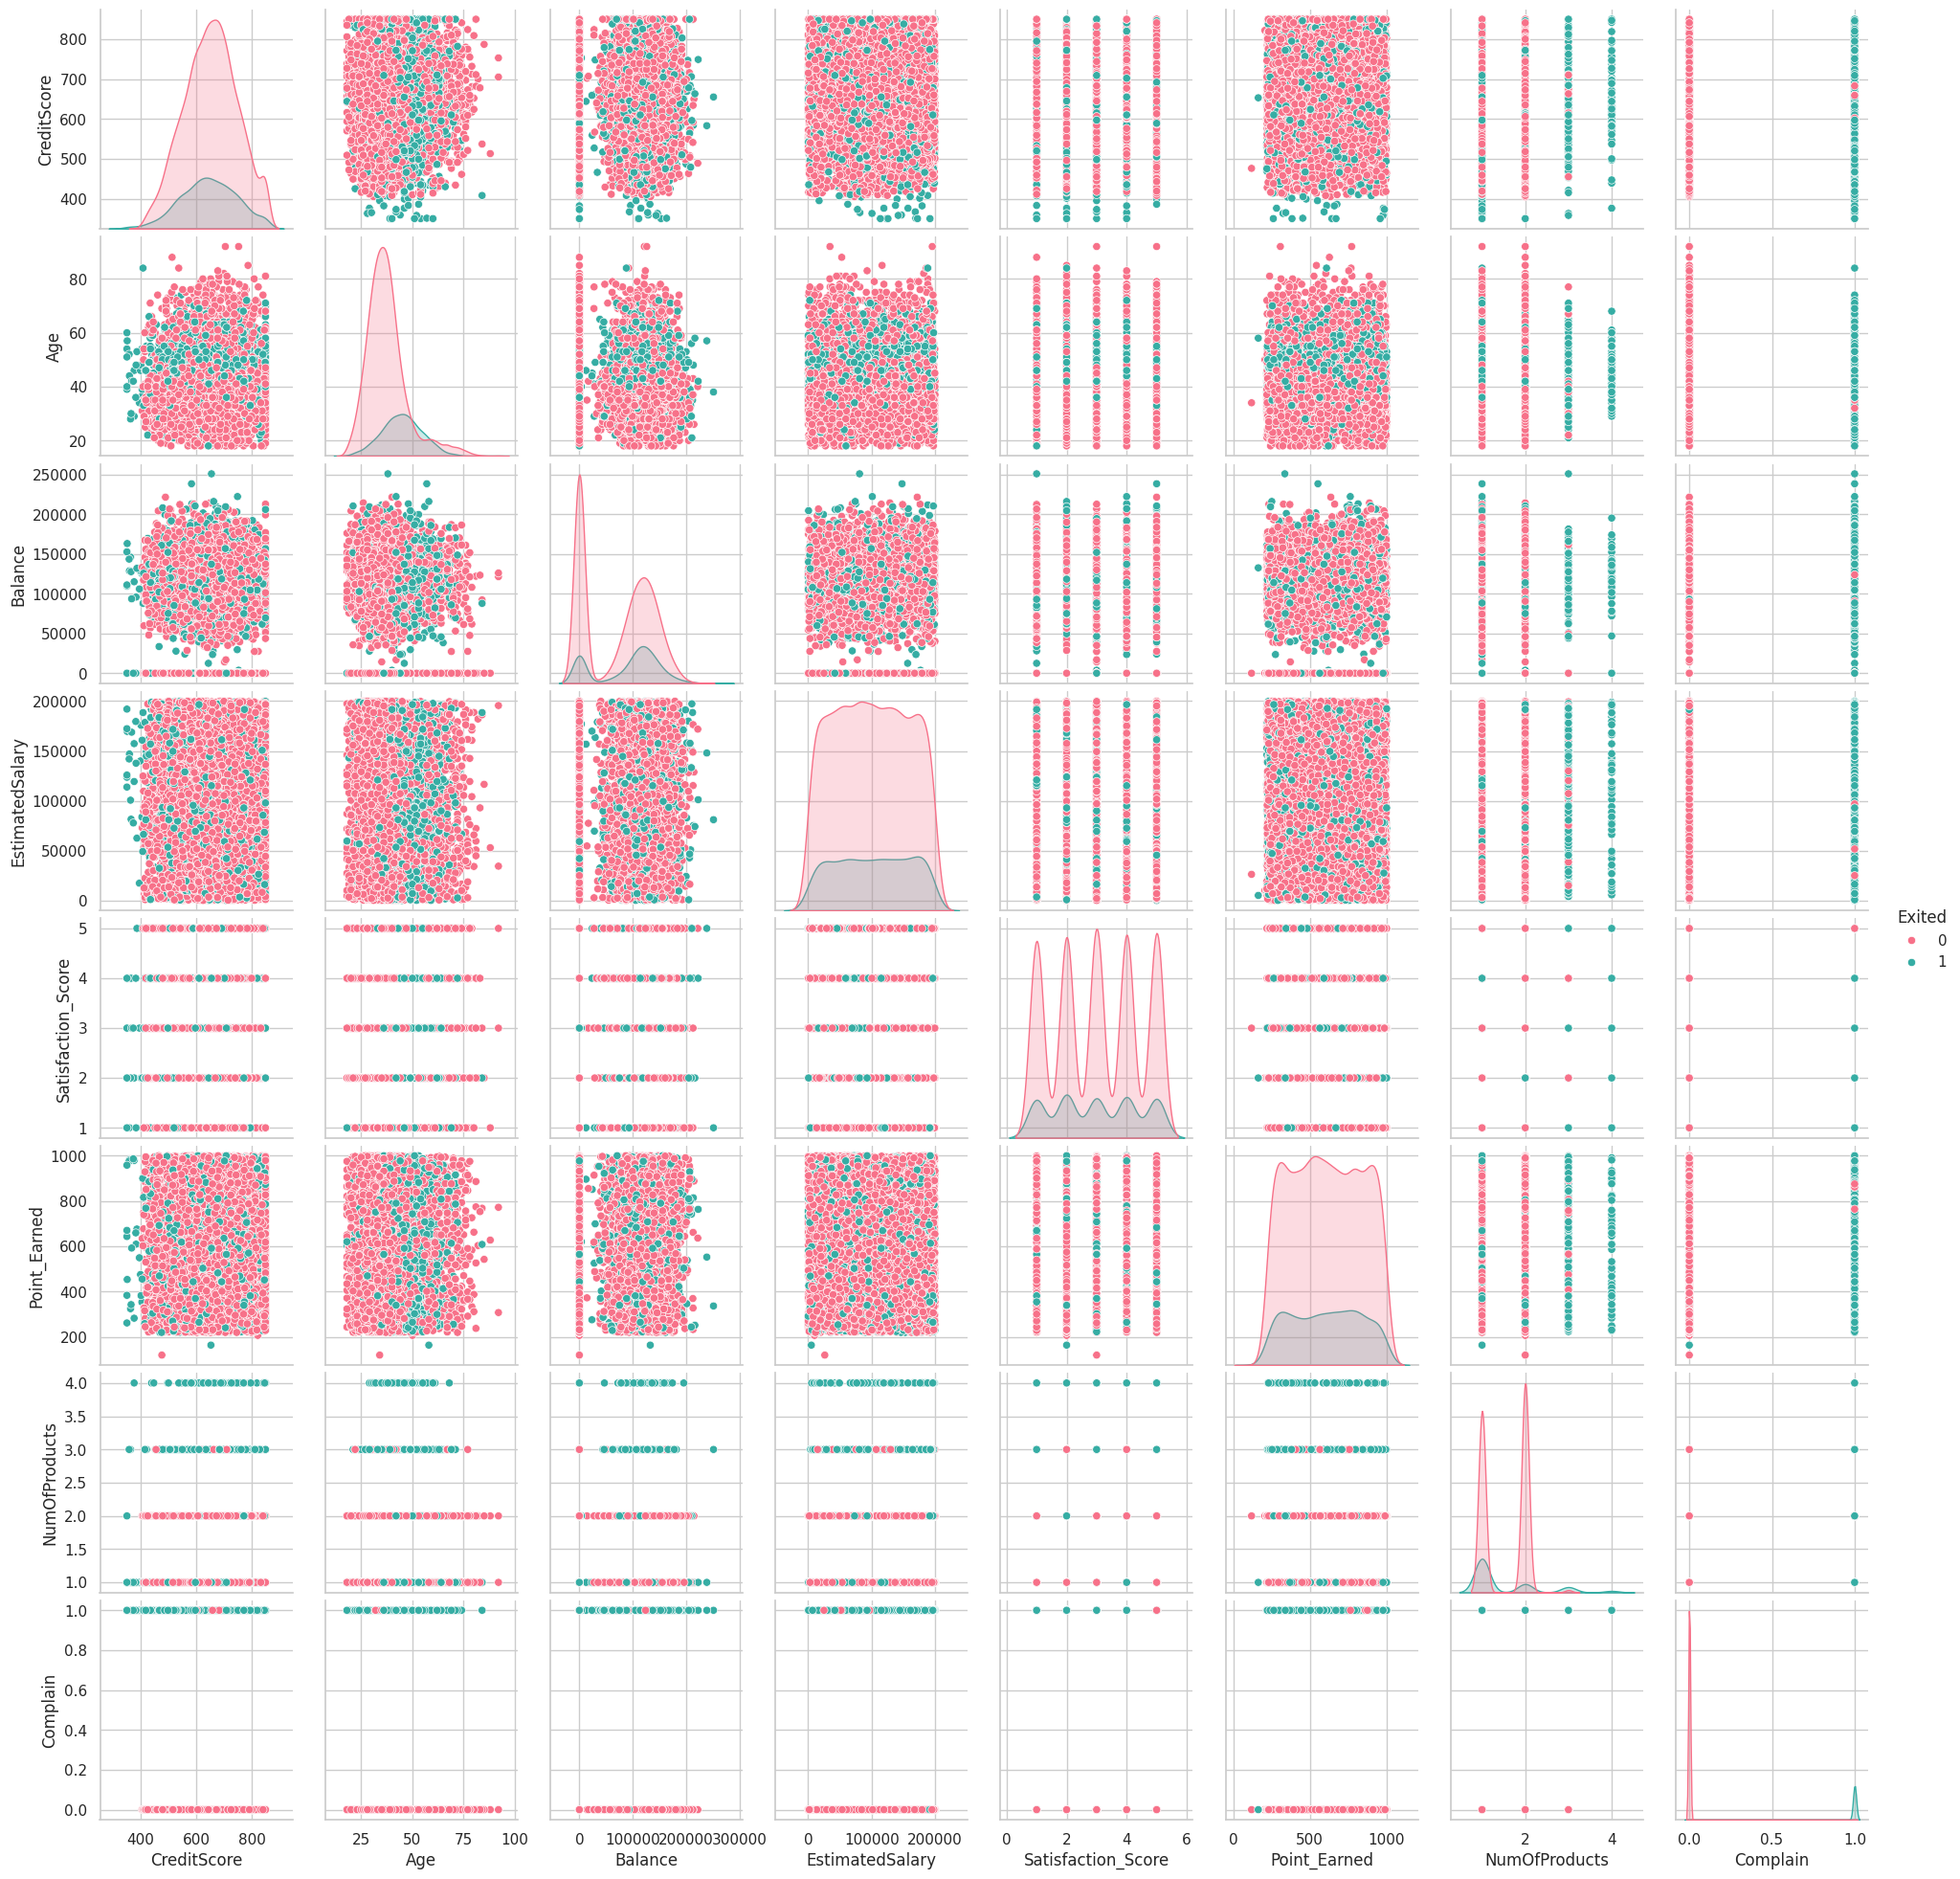

In [23]:
sns.pairplot(df[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'EstimatedSalary', 'Exited', 'Satisfaction_Score', 'Point_Earned', 'NumOfProducts', 'Complain']],
             hue='Exited',
             diag_kind='kde',
             kind='scatter',
             palette='husl')
plt.show()

Dari hasil analisis menggunakan pairplot, fitur seperti NumOfProducts, Age, dan Balance masih menunjukkan perbedaan yang berarti antara pelanggan yang churn dan yang tidak churn.  

Fitur Complain menambah perspektif, karena pelanggan dengan keluhan lebih mungkin untuk churn, terutama jika keluhan tersebut berhubungan dengan faktor kepuasan.

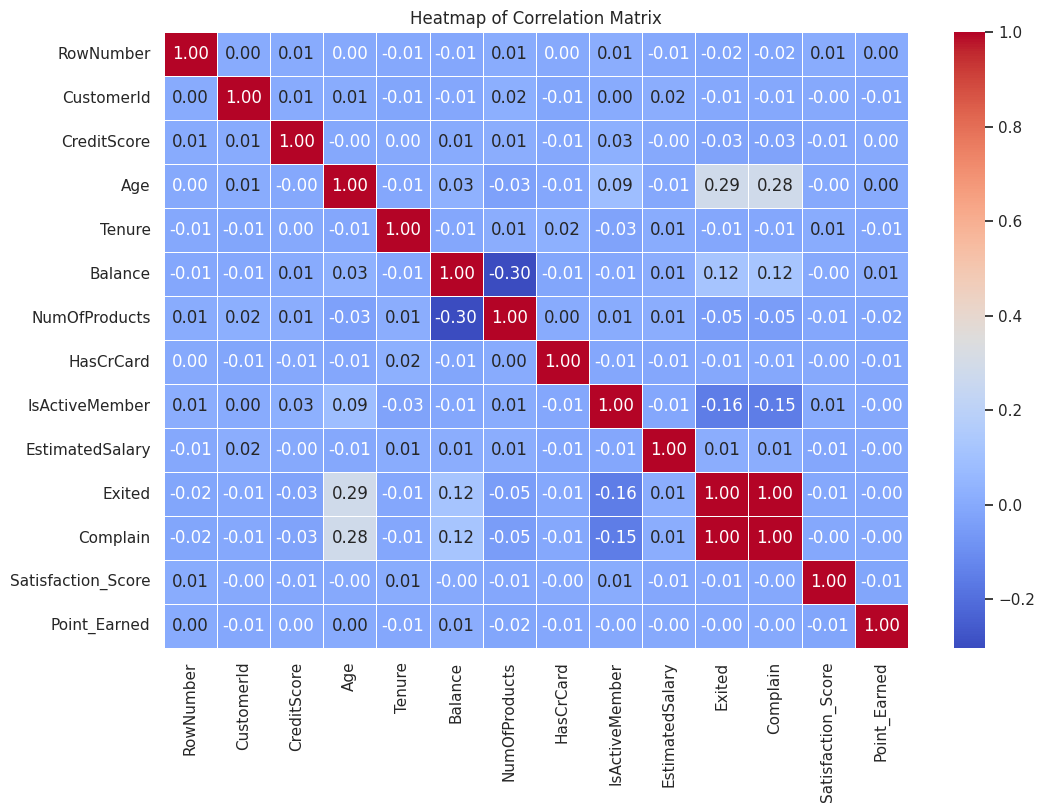

In [24]:
# Menghitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Heatmap di atas menunjukkan matriks korelasi antara berbagai fitur dalam dataset. Korelasi diukur dalam rentang -1 hingga 1, di mana:

- **Nilai 1 (merah terang)** menunjukkan korelasi positif yang sempurna antara dua fitur, artinya peningkatan satu variabel cenderung diikuti oleh peningkatan variabel lainnya.
- **Nilai -1 (biru terang)** menunjukkan korelasi negatif yang sempurna, di mana peningkatan satu variabel cenderung diikuti oleh penurunan variabel lainnya.
- **Nilai mendekati 0 (biru gelap)** menunjukkan tidak adanya atau sedikit korelasi antara dua fitur.  

  

*Temuan Utama:*
1. **Korelasi tertinggi**: Complain memiliki sempurna dengan variabel `Exited`, yaitu sebesar 1 yang menunjukan adanya variabel positif yang menunjukan kecenderungan bahwa customer yang melakukan complain akan sangat mungkin melakukan Churn.
   
2. **Korelasi lainnya**:
   - Korelasi lainnya dalam dataset ini adalah antara **Age** dan **Exited** dengan nilai 0.29, menunjukkan bahwa usia memiliki hubungan positif yang lemah dengan variabel target `Exited`.
   
3. **Korelasi Negatif**:
   - Ada korelasi negatif antara **IsActiveMember** dan **Exited** (-0.16), menunjukkan bahwa pelanggan yang aktif cenderung memiliki peluang lebih rendah untuk keluar dari layanan. Namun, nilai korelasinya juga cukup rendah.

4. **Interaksi Fitur Lainnya**: Sebagian besar fitur memiliki korelasi sangat rendah satu sama lain, seperti **CreditScore** terhadap fitur lain yang hampir semuanya berada di sekitar 0. Ini menunjukkan bahwa sebagian besar fitur cukup independen.

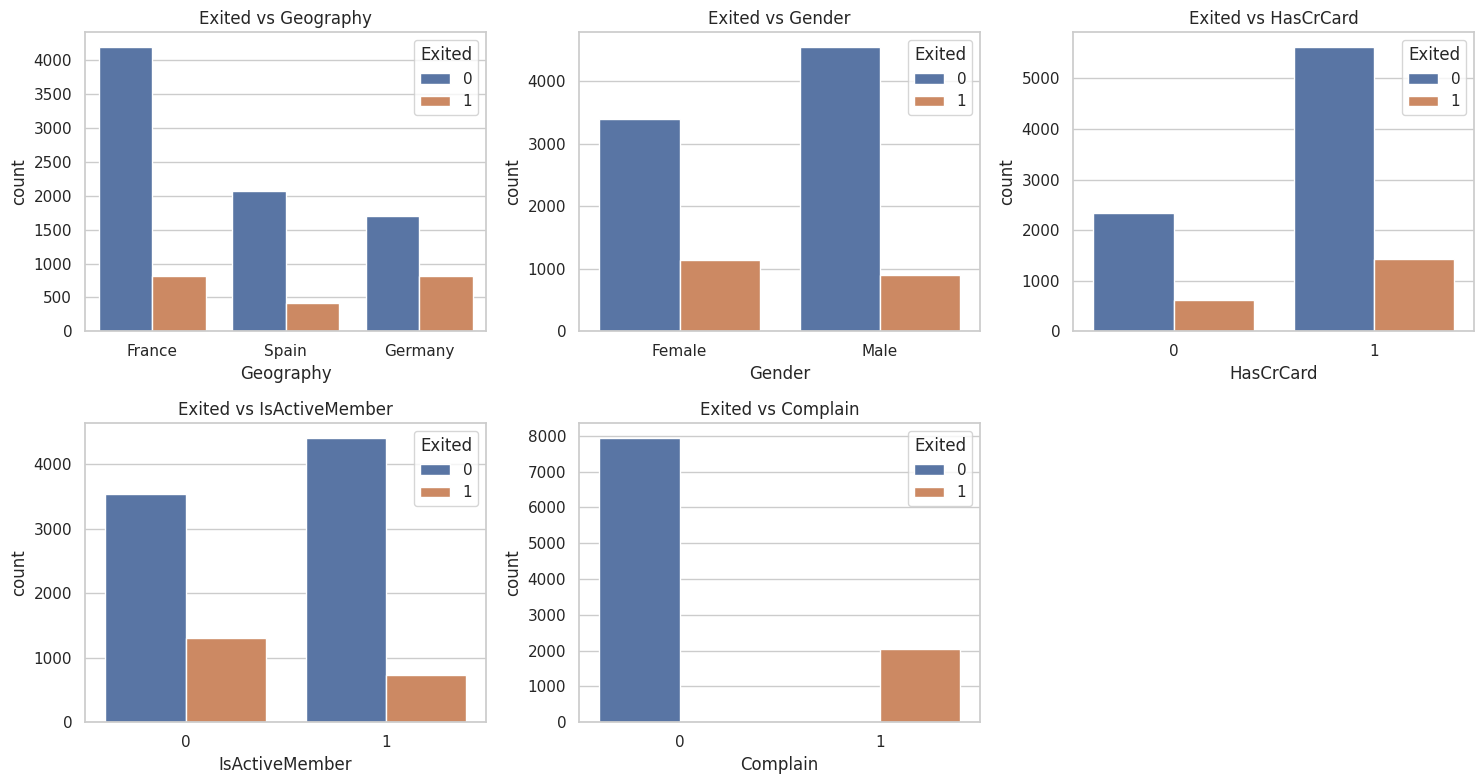

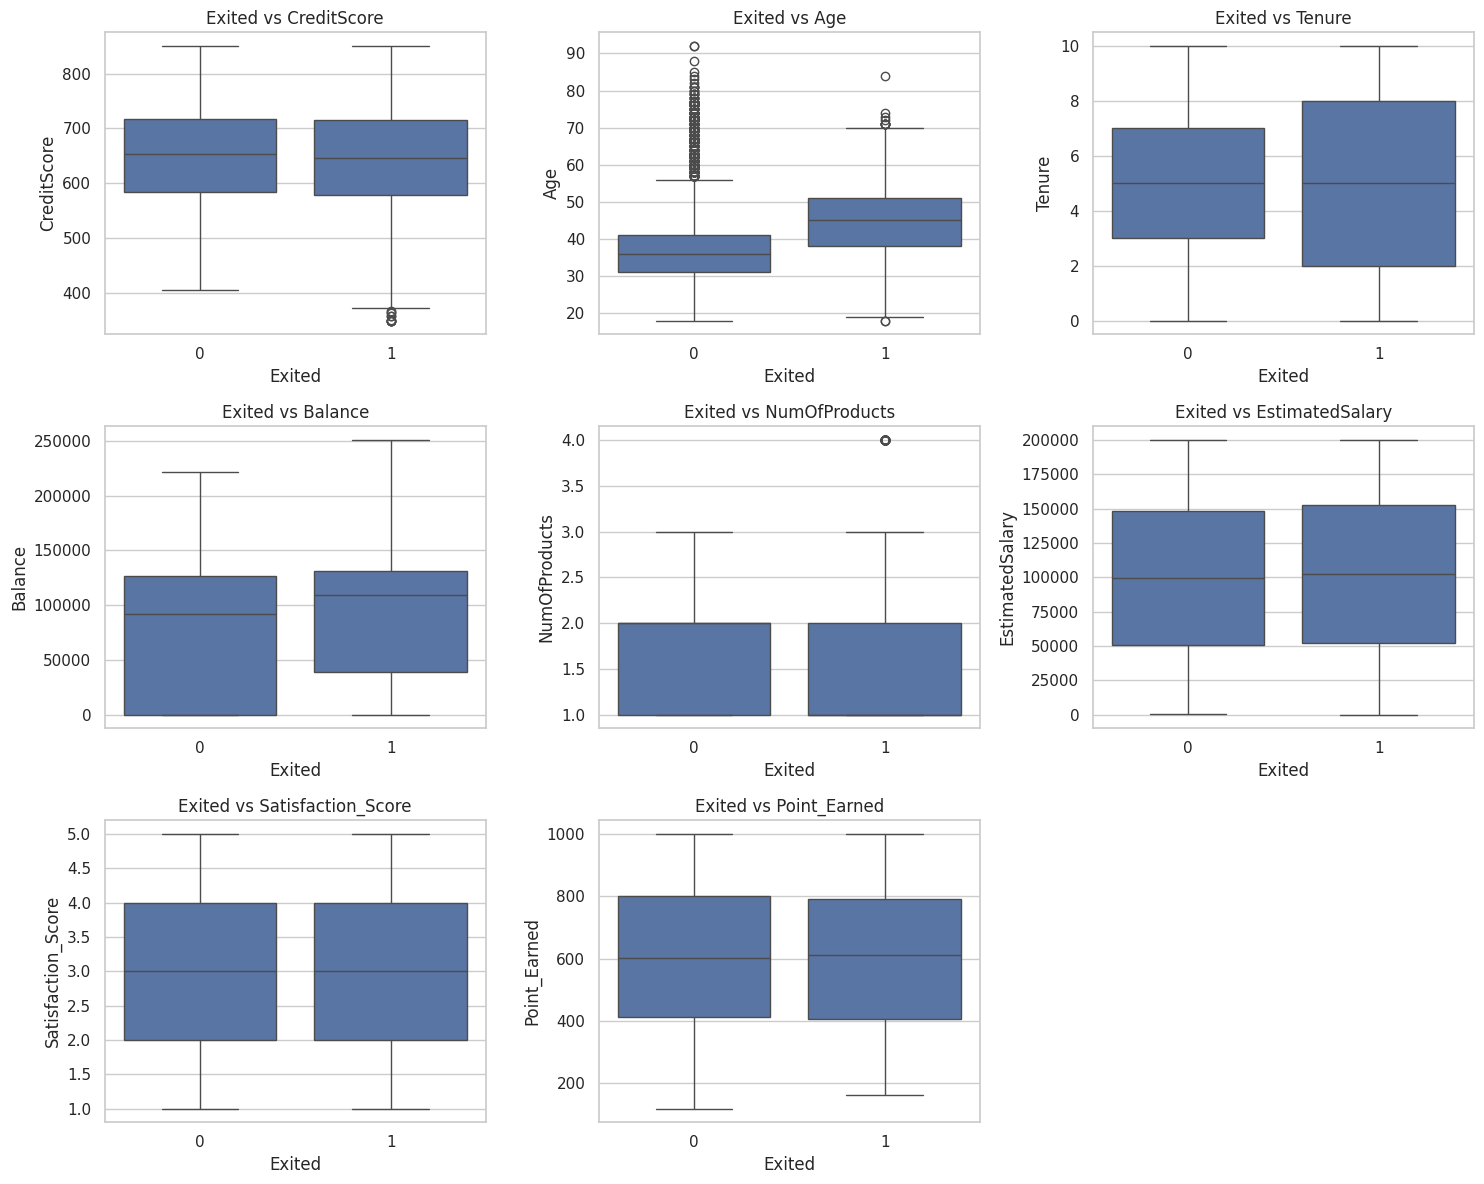

In [25]:
# Daftar variabel kategorikal dan numerik
categorical_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain']
numerical_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction_Score', 'Point_Earned']

# Mengatur ukuran figure
plt.figure(figsize=(15, 8))

# Plot perbandingan untuk variabel kategorikal
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=var, hue='Exited')
    plt.title(f'Exited vs {var}')
    plt.legend(title='Exited', loc='upper right')

plt.tight_layout()
plt.show()

# Plot perbandingan untuk variabel numerik
plt.figure(figsize=(15, 12))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='Exited', y=var)
    plt.title(f'Exited vs {var}')

plt.tight_layout()
plt.show()

Dari hasil analisis `perbandingan` variabel kategorikal, beberapa variabel yang tampaknya memiliki hubungan kuat dengan churn adalah Geography (terutama Jerman), Gender (perempuan), IsActiveMember (keanggotaan aktif), dan Complain (pelanggan yang pernah komplain). Variabel HasCrCard tampaknya kurang memberikan pengaruh signifikan terhadap churn.  

Dari hasil analisis variabel numerik vs exited menggunakan `boxplot`, Age tampak sebagai variabel yang paling relevan dalam membedakan antara pelanggan yang churn dan yang tidak. Variabel lain seperti NumOfProducts juga menunjukkan sedikit perbedaan, namun tidak sejelas variabel Age. Variabel lainnya, seperti CreditScore, Tenure, Balance, EstimatedSalary, Satisfaction_Score, dan Point_Earned, menunjukkan distribusi yang hampir serupa untuk kedua kelompok dan mungkin memiliki pengaruh yang lebih kecil terhadap churn.

### Feature Selection

## Data Preprocessing

### Drop Feature


Pada tahap ini, beberapa langkah pra-pemrosesan diterapkan pada dataset agar model lebih mudah dalam memahami data:

1. **Menghapus Kolom yang Tidak Relevan**: Kolom `RowNumber`, `Surname`, dan `CustomerId` dihapus dari dataset karena tidak berkontribusi langsung terhadap prediksi.

2. **Encoding Variabel Kategorikal**: Kolom kategorikal seperti `Geography`, `Gender`, dan `Card_Type` dikonversi menjadi bentuk numerik menggunakan teknik One-Hot Encoding. Hasil encoding ini disimpan dalam variabel `hot`.

3. **Menggabungkan Hasil Encoding**: Dataset utama `df` dikombinasikan dengan data hasil encoding (`hot`) sehingga informasi dalam variabel kategorikal sekarang tersimpan sebagai kolom numerik.

4. **Menghapus Kolom Kategorikal Asli**: Setelah encoding, kolom asli `Geography`, `Gender`, dan `Card_Type` dihapus dari dataset untuk menghindari redundansi.

5. **Mempersiapkan Fitur dan Label**: Semua kolom kecuali `Exited` diambil sebagai fitur (`X`), sementara kolom `Exited` dijadikan label (`y`). Fitur `X` diubah ke dalam bentuk array untuk memudahkan proses pelatihan model.

In [26]:
# Menghapus kolom yang tidak relevan
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)

In [27]:
# Encoding kolom data kategorikal
encoder = pd.get_dummies(df[['Geography', 'Gender', 'Card_Type']])
hot = encoder

# Menghapus kolom kategorikal
df = pd.concat([df, hot], axis = 1)
df = df.drop(['Geography', 'Gender', 'Card_Type'], axis = 1)

In [28]:
# Menginisialisasi Kolom exited sebagai target
X = df.drop('Exited', axis = 1)
X = X.values
y = df['Exited']

### Split Dataset

Pada project ini, dataset dibagi menjadi dua bagian, yaitu data pelatihan dan data pengujian, dengan perbandingan 80:20. Artinya, 80% dari data digunakan untuk melatih model, sementara 20% sisanya digunakan untuk menguji performa model. Pembagian ini bertujuan untuk memastikan bahwa model dapat mempelajari pola dari data pelatihan, dan kemudian diuji pada data pengujian yang belum pernah dilihat model sebelumnya.


In [29]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit dan transform data latih
X_test_scaled = scaler.transform(X_test)  # Hanya transform data uji

# Menampilkan hasil standarisasi
print("X_train_scaled:\n", X_train_scaled[:5])  # Menampilkan 5 data pertama setelah scaling
print("X_test_scaled:\n", X_test_scaled[:5])  # Menampilkan 5 data pertama setelah scaling

X_train_scaled:
 [[ 0.35649971 -0.6557859   0.34567966 -1.21847056  0.80843615  0.64920267
   0.97481699  1.36766974 -0.50994211 -0.72001005 -0.43019311  1.00150113
  -0.57946723 -0.57638802 -0.91324755  0.91324755  1.72974448 -0.57715782
  -0.58023704 -0.57388614]
 [-0.20389777  0.29493847 -0.3483691   0.69683765  0.80843615  0.64920267
   0.97481699  1.6612541  -0.50994211  0.70434217  1.56590792 -0.99850112
   1.72572313 -0.57638802 -0.91324755  0.91324755 -0.57812007 -0.57715782
   1.72343359 -0.57388614]
 [-0.96147213 -1.41636539 -0.69539349  0.61862909 -0.91668767  0.64920267
  -1.02583358 -0.25280688  1.96100692  0.70434217 -1.24374877 -0.99850112
  -0.57946723  1.73494238 -0.91324755  0.91324755 -0.57812007 -0.57715782
  -0.58023704  1.74250594]
 [-0.94071667 -1.13114808  1.38675281  0.95321202 -0.91668767  0.64920267
  -1.02583358  0.91539272  1.96100692 -0.72001005 -0.17679053  1.00150113
  -0.57946723 -0.57638802  1.09499335 -1.09499335 -0.57812007 -0.57715782
  -0.58023704 

## Model Development

### Algoritma random forest

In [30]:
# Menentukan parameter model
param_grid = {
    'n_estimators': [100, 200, 500],
    'min_samples_split': [2, 5, 10],
    'max_depth': [10, 15, 20],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, param_grid, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.9985000000000002
Mín Split:  2
Max Nvl:  20


- **Algoritma**: Gini
  - Model ini menggunakan algoritma **Decision Tree** dengan **impurity criterion** berdasarkan **Gini index** untuk memisahkan data.

- **Score**: 0.9985
  - Skor model ini mencapai **99.85%**, menunjukkan performa yang sangat baik dalam mengklasifikasikan data dengan akurasi tinggi.

- **Min Split**: 2
  - Model memiliki parameter **minimum split** sebesar **2**, yang artinya sebuah node akan terbagi jika ada setidaknya 2 sample yang dapat dipisahkan.

- **Max Depth**: 20
  - **Kedalaman maksimum** (maximum depth) dari pohon keputusan ini dibatasi hingga **20 level**, untuk mengontrol ukuran pohon dan menghindari overfitting.


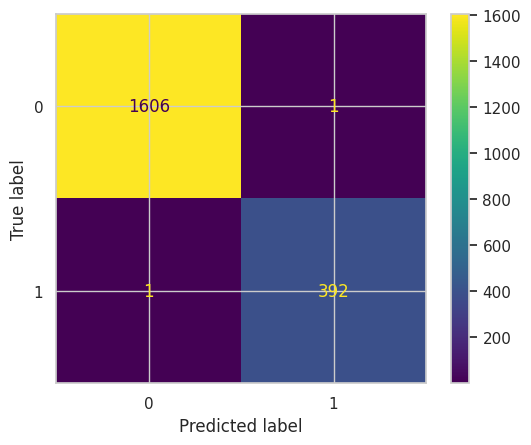

In [31]:
# Membangun model
rf_model = RandomForestClassifier(**best_params, random_state=0)
rf_model.fit(X_train, y_train)
previsoes = rf_model.predict(X_test)

# Kalkulasi confussion matrix
cm = confusion_matrix(y_test, previsoes)

# Membuat display confussion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Memanggil gambar confussion matrix
disp.plot()
plt.show()

Berdasarkan model yang dibuat menggunakan algoritma random forest, diperoleh  confussion matrix dengan hasil performa yang sangat baik. Model mampu mengklasifikasikan kesalahan hanya pada 1 data, baik pada data yang diprediksi maupun pada data yang sebenarnya.

In [32]:
# Prediksi data uji
y_pred = rf_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

# Menampilkan laporan klasifikasi dan confussion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on test data: 0.999

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Model yang diuji menunjukkan hasil yang sangat baik pada data uji dengan akurasi 99.9%. Ini berarti bahwa model berhasil mengklasifikasikan hampir semua sampel dengan benar. Rata-rata untuk semua metrik (macro avg dan weighted avg) menunjukkan nilai sempurna (1.00), mengindikasikan kinerja yang konsisten di seluruh kelas.

Secara keseluruhan, model ini memiliki performa yang sangat tinggi dalam mendeteksi kedua kelas pada data uji, dengan tingkat kesalahan yang mendekati nol.

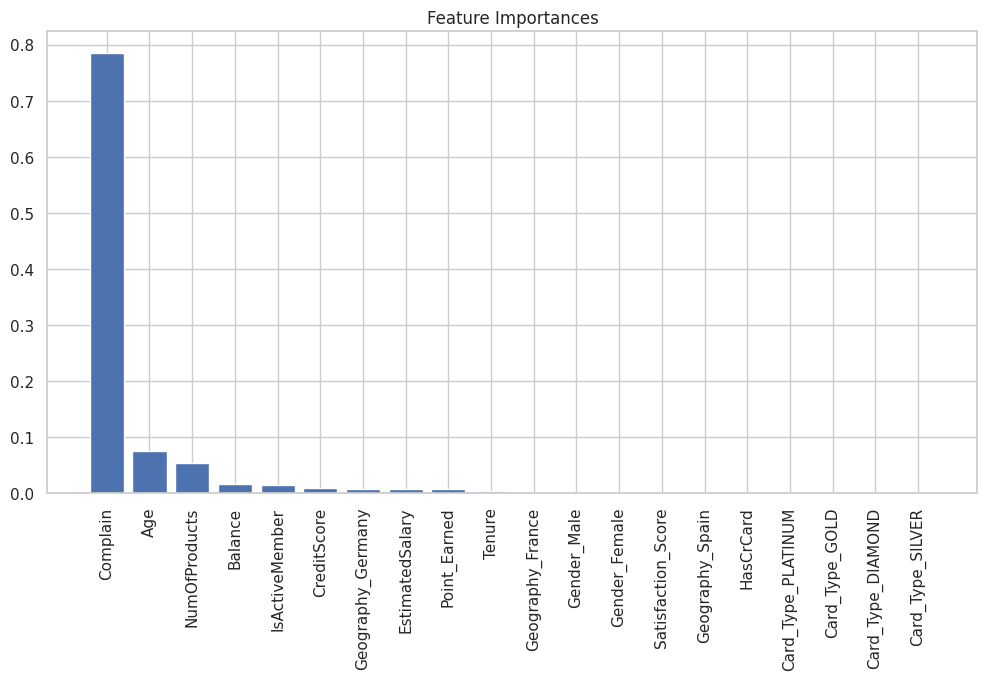

In [33]:
# Menampilkan fitur penting
feature_importances = rf_model.feature_importances_
feature_names = df.drop('Exited', axis=1).columns

# Plot
plt.figure(figsize=(12, 6))
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.title('Feature Importances')
plt.show()


Hasil yang diperoleh dari model yang dibuat, ditemukan bahwa variabel komplain memberikan pengaruh yang paling tinggi terhadap variabel exited nasabah dan diikuti oleh variabel usia, jumlah produk dan balance setelahnya.

### Algoritma logistic regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi pada data uji: 0.80
Confusion Matrix:
[[1571   36]
 [ 366   27]]


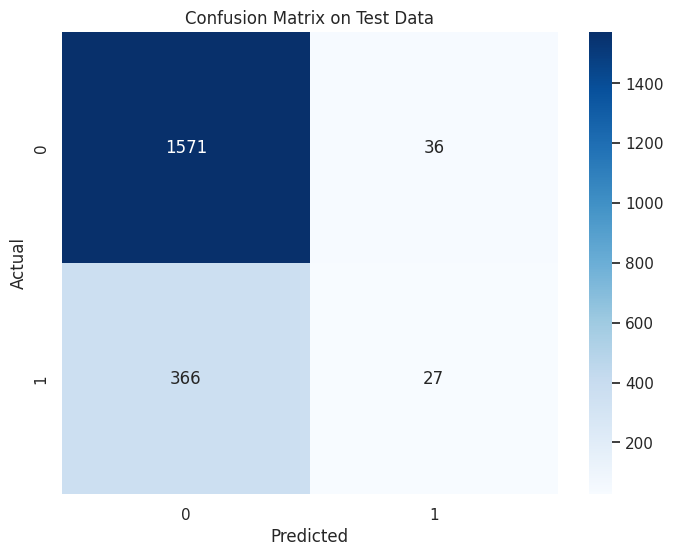

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.43      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.62      0.52      0.50      2000
weighted avg       0.74      0.80      0.74      2000



In [34]:
# Inisialisasi model Logistic Regression
log_reg = LogisticRegression(random_state=0)

# Latih model
log_reg.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = log_reg.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada data uji: {accuracy:.2f}")

# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Menampilkan classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Model **Random Forest** yang diuji sebelumnya menunjukkan hasil yang jauh lebih baik dengan akurasi sebesar 99.85% dan kinerja yang sangat baik pada kedua kelas, termasuk kelas minoritas. Sebaliknya, model **Logistic Regression** memiliki kelemahan yang cukup signifikan dalam mendeteksi kelas minoritas, yang terlihat dari rendahnya nilai recall (0.07) dan F1-score (0.12) pada kelas tersebut.

Perbedaan utama antara kedua model ini adalah:
- **Akurasi Keseluruhan**: Random Forest (99.85%) jauh lebih tinggi dibandingkan Logistic Regression (80%).
- **Kinerja pada Kelas Minoritas**: Random Forest dapat memprediksi kelas minoritas dengan jauh lebih baik dibandingkan Logistic Regression, yang mengalami kesulitan dalam mendeteksi instance kelas ini.
- **General Performa**: Random Forest menghasilkan model yang lebih andal dan seimbang pada kedua kelas, sementara Logistic Regression tampak bias terhadap kelas mayoritas.

Secara keseluruhan, **Random Forest** adalah model yang lebih unggul untuk dataset ini dibandingkan dengan **Logistic Regression**.

## Inference

In [35]:
# Simpan model
joblib.dump(rf_model, '/content/rf_model.joblib')

print("Model berhasil disimpan dalam format joblib")

Model berhasil disimpan dalam format joblib


### Membuat data sintetis

#### Pembuatan Data Sintetis dengan CTGAN

Dalam analisis data, seringkali kita dihadapkan pada situasi di mana data aktual terbatas atau tidak seimbang. Salah satu solusi yang efektif untuk mengatasi masalah ini adalah dengan menggunakan data sintetis, yang dapat membantu memperkaya dataset agar model pembelajaran mesin memiliki lebih banyak variasi dan memperoleh hasil yang lebih akurat.

Pada project ini, kami menggunakan **CTGAN (Conditional Tabular Generative Adversarial Network)** untuk menghasilkan data sintetis yang menyerupai distribusi data asli. CTGAN adalah metode berbasis Generative Adversarial Network (GAN) yang dirancang khusus untuk data tabular. Dengan CTGAN, kami dapat menghasilkan data sintetis yang mencerminkan pola, hubungan, dan distribusi data asli, termasuk data kategorikal maupun numerik.

Berikut adalah langkah-langkah dasar yang diambil untuk membuat data sintetis menggunakan CTGAN:
1. **Training Model CTGAN**: Model CTGAN dilatih pada dataset asli untuk mempelajari pola dan distribusi data tersebut.
2. **Membuat Data Sintetis**: Setelah proses pelatihan, model digunakan untuk menghasilkan data baru yang menyerupai data asli.
3. **Menggunakan Data Sintetis**: Data yang dihasilkan dapat digunakan untuk berbagai keperluan. Pada project ini, data sintetis digunakan untuk melakukan uji model (inference) yang telah dibuat.

In [37]:
# Load model yang sudah disimpan
rf_model = joblib.load('/content/rf_model.joblib')

# Inisialisasi model CTGAN ke variabel baru
ctgan_model = CTGAN()

# Fit themodel CTGAN ke data asli
ctgan_model.fit(df)

# Membuat model CTGAN dari trained model
synthetic_data = ctgan_model.sample(10000)

# Pisahkan fitur dan label
X_synthetic = synthetic_data.drop('Exited', axis=1)
y_synthetic = synthetic_data['Exited']

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Pada kode di atas, beberapa langkah diambil untuk memuat model, membuat data sintetis, dan mempersiapkannya untuk analisis lebih lanjut.

1. **Import Library yang Diperlukan**:
   - Library `joblib` digunakan untuk memuat model yang telah disimpan.
   - `pandas` digunakan untuk mengelola data dalam bentuk DataFrame.
   - `accuracy_score`, `confusion_matrix`, dan `classification_report` dari `sklearn.metrics` disiapkan untuk evaluasi model.
   - `seaborn` dan `matplotlib.pyplot` untuk visualisasi.
   - `CTGAN` dari library `ctgan` digunakan untuk menghasilkan data sintetis.

2. **Memuat Model yang Disimpan**:
   - Model `RandomForestClassifier` yang sebelumnya telah dilatih dan disimpan dengan `joblib` dimuat menggunakan `joblib.load('/content/rf_model.joblib')`.

3. **Inisialisasi Model CTGAN**:
   - `CTGAN` digunakan untuk membangkitkan data sintetis. Model ini diinisialisasi sebagai `ctgan_model`.

4. **Melatih CTGAN dengan Data Asli**:
   - `ctgan_model.fit(df)` digunakan untuk melatih model CTGAN dengan data asli (`df`). Proses ini penting untuk menghasilkan data sintetis yang memiliki pola serupa dengan data asli.

5. **Membuat Data Sintetis**:
   - `ctgan_model.sample(10000)` menghasilkan 10.000 baris data sintetis berdasarkan pola dari data asli yang telah dipelajari.

6. **Memisahkan Fitur dan Label**:
   - Setelah data sintetis dibuat, data tersebut dipisahkan menjadi variabel fitur (`X_synthetic`) dan label (`y_synthetic`). Label 'Exited' dipisahkan untuk mempersiapkan data bagi proses analisis atau pelatihan model lebih lanjut.

### Inference dengan Random forest

Pada kode berikut, dilakukan proses inferensi pada data sintetis menggunakan model `RandomForestClassifier` yang telah dilatih sebelumnya.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Akurasi pada data sintetis: 0.94
Confusion Matrix:
[[7657  346]
 [ 299 1698]]


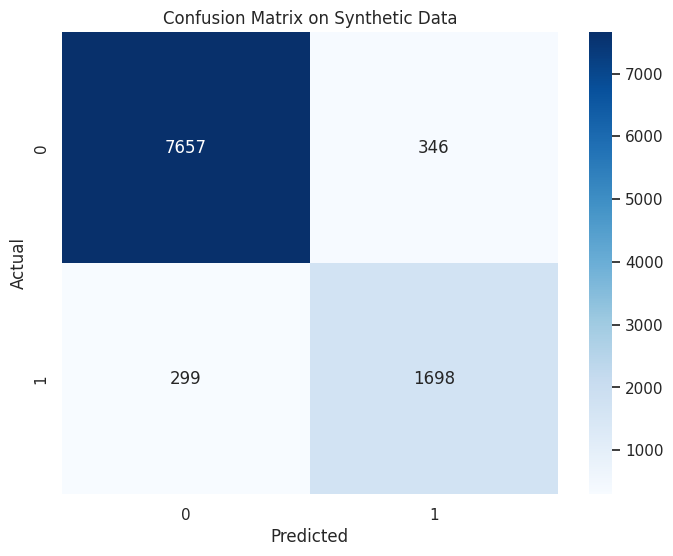

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8003
           1       0.83      0.85      0.84      1997

    accuracy                           0.94     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.94      0.94      0.94     10000



In [41]:
# Lakukan inference pada data sintetis using the RandomForestClassifier model
predictions = rf_model.predict(X_synthetic)

# Menampilkan akurasi
accuracy = accuracy_score(y_synthetic, predictions)
print(f"Akurasi pada data sintetis: {accuracy:.2f}")

# Menampilkan confusion matrix
cm = confusion_matrix(y_synthetic, predictions)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Synthetic Data')
plt.show()

# Menampilkan classification report
report = classification_report(y_synthetic, predictions)
print("Classification Report:")
print(report)

Berdasarkan hasil evaluasi, model `RandomForestClassifier` mencapai akurasi sebesar 0.95 atau 95% pada data sintetis. Berikut adalah penjelasan lebih detail dari hasil classification report:

- **Class 0** (label mayoritas):
  - **Precision**: 0.96, menunjukkan bahwa 96% dari prediksi untuk kelas ini benar.
  - **Recall**: 0.96, menunjukkan bahwa model berhasil mengidentifikasi 96% dari semua instance sebenarnya dalam kelas ini.
  - **F1-Score**: 0.96, yang merupakan kombinasi dari precision dan recall, menunjukkan performa model yang konsisten pada kelas ini.

- **Class 1** (label minoritas):
  - **Precision**: 0.83, menunjukkan bahwa 83% dari prediksi untuk kelas ini benar.
  - **Recall**: 0.90, menunjukkan bahwa model berhasil mengidentifikasi 90% dari semua instance sebenarnya dalam kelas ini.
  - **F1-Score**: 0.84, yang menunjukkan kinerja yang baik meskipun lebih rendah daripada kelas mayoritas.

- **Akurasi Keseluruhan**: Model mencapai akurasi 94%, yang berarti bahwa 94% prediksi pada data sintetis adalah benar.
  
- **Macro Average**: Nilai rata-rata precision, recall, dan F1-score untuk kedua kelas adalah 0.90, yang memberikan gambaran kinerja rata-rata untuk masing-masing kelas.
  
- **Weighted Average**: Nilai rata-rata precision, recall, dan F1-score dengan mempertimbangkan proporsi setiap kelas adalah 0.94, yang menunjukkan bahwa model memiliki kinerja keseluruhan yang baik, terutama pada kelas mayoritas.

Secara keseluruhan, model menunjukkan performa yang sangat baik dalam memprediksi kelas mayoritas, dengan performa yang cukup baik juga untuk kelas minoritas.


### Inference dengan logistic regression

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Akurasi pada data sintetis: 0.80
Confusion Matrix pada Data Sintetis:
[[7955   48]
 [1988    9]]


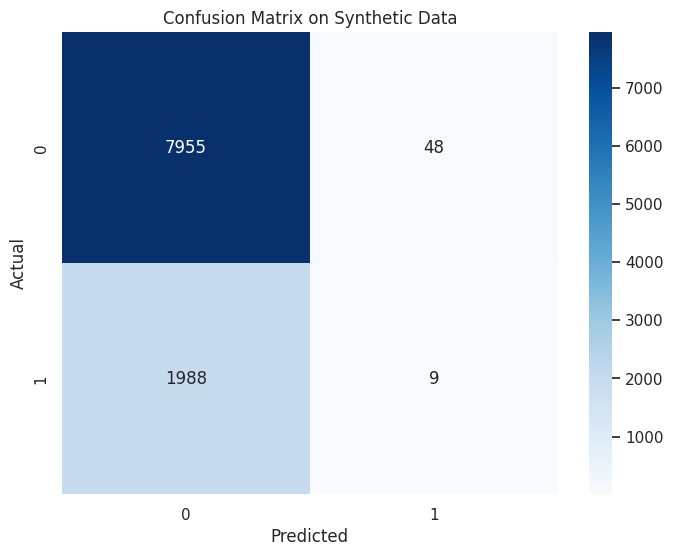

Classification Report pada Data Sintetis:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      8003
           1       0.16      0.00      0.01      1997

    accuracy                           0.80     10000
   macro avg       0.48      0.50      0.45     10000
weighted avg       0.67      0.80      0.71     10000



In [39]:
# Melakukan prediksi pada data sintetis
synthetic_data_for_prediction = synthetic_data[X_synthetic.columns]

# Prediksi menggunakan data sintetis
synthetic_predictions = log_reg.predict(synthetic_data_for_prediction)

# Asumsikan synthetic_y sebagai target untuk data sintetis
accuracy = accuracy_score(y_synthetic, synthetic_predictions)
print(f"Akurasi pada data sintetis: {accuracy:.2f}")

# Menampilkan confusion matrix
cm = confusion_matrix(y_synthetic, synthetic_predictions)
print("Confusion Matrix pada Data Sintetis:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Synthetic Data')
plt.show()

# Menampilkan classification report
report = classification_report(y_synthetic, synthetic_predictions)
print("Classification Report pada Data Sintetis:")
print(report)


Model **Logistic Regression** menghasilkan akurasi sebesar 0.80 atau 80% pada data sintetis. Berikut adalah ringkasan hasil evaluasi berdasarkan classification report:

- **Class 0** (label mayoritas):
  - **Precision**: 0.80, yang berarti 80% prediksi kelas 0 adalah benar.
  - **Recall**: 0.99, menunjukkan bahwa model berhasil mengidentifikasi 99% dari semua instance sebenarnya di kelas ini.
  - **F1-Score**: 0.89, menunjukkan performa yang baik pada kelas mayoritas.

- **Class 1** (label minoritas):
  - **Precision**: 0.16, menunjukkan bahwa hanya 16% dari prediksi kelas 1 adalah benar.
  - **Recall**: 0.00, menunjukkan model hanya mengidentifikasi 0% dari instance yang sebenarnya di kelas ini.
  - **F1-Score**: 0.01, yang menunjukkan performa yang lemah pada kelas ini.

- **Akurasi Keseluruhan**: Model mencapai akurasi 80%, yang menunjukkan bahwa 80% prediksi pada data sintetis adalah benar.

- **Macro Average**: Rata-rata precision, recall, dan F1-score untuk kedua kelas adalah sekitar 0.48, 0.5, dan 0.45. Nilai ini menunjukkan bahwa kinerja pada kedua kelas, terutama kelas minoritas, masih rendah.

- **Weighted Average**: Nilai rata-rata precision, recall, dan F1-score dengan mempertimbangkan proporsi masing-masing kelas adalah sekitar 0.67, 0.80, dan 0.71, yang menunjukkan performa yang lebih baik pada kelas mayoritas.

## Kesimpulan  

Model **Random Forest** yang diuji pada data sintetis sebelumnya memberikan hasil yang jauh lebih baik, dengan akurasi sebesar 95% dan kinerja yang lebih seimbang pada kedua kelas, termasuk kelas minoritas.

Perbedaan utama antara kedua model ini adalah:
- **Akurasi Keseluruhan**: Random Forest (95%) lebih tinggi dibandingkan Logistic Regression (80%).
- **Kinerja pada Kelas Minoritas**: Random Forest menunjukkan performa yang lebih baik dalam memprediksi kelas minoritas dibandingkan Logistic Regression, yang mengalami kesulitan dengan nilai recall yang rendah (0.18) pada kelas tersebut.
- **General Performa**: Random Forest memberikan hasil yang lebih andal dan seimbang untuk kedua kelas, sementara Logistic Regression cenderung bias terhadap kelas mayoritas.

Secara keseluruhan, **Random Forest** menunjukkan kinerja yang lebih unggul pada data sintetis dibandingkan dengan **Logistic Regression**, terutama dalam menangani kelas minoritas.